In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Fill missing values in age column with mean age and fill na values in cabin column with "No Cabin"

In [ ]:
df['Age'] = df['Age'].fillna(value = df['Age'].mean())
df['Cabin'] = df['Cabin'].apply(lambda x: "Don't have a Cabin" if pd.isna(x) else "Have a Cabin")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Survived"].value_counts(normalize = True)

,proportion
Survived,
0,0.616162
1,0.383838


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df = df.drop(columns=["PassengerId", "Name","Ticket"])

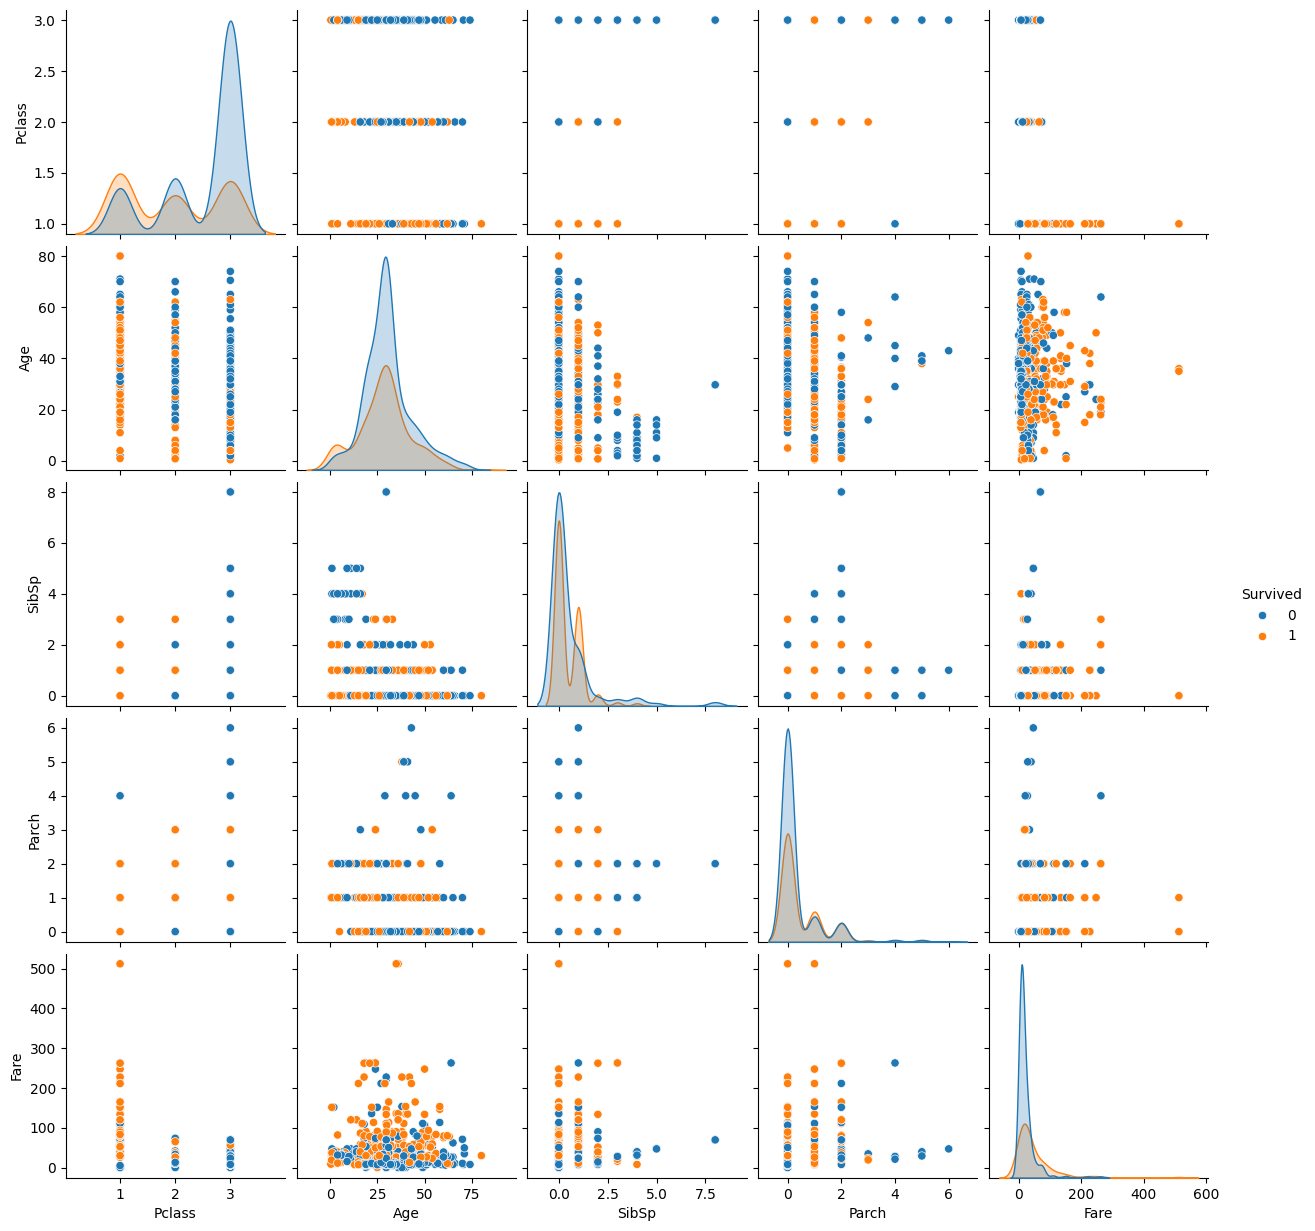

In [ ]:
sns.pairplot(df, hue = "Survived")

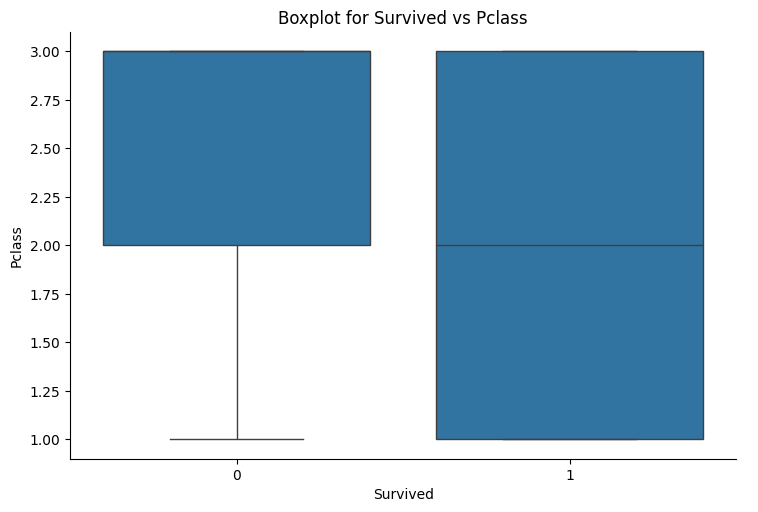

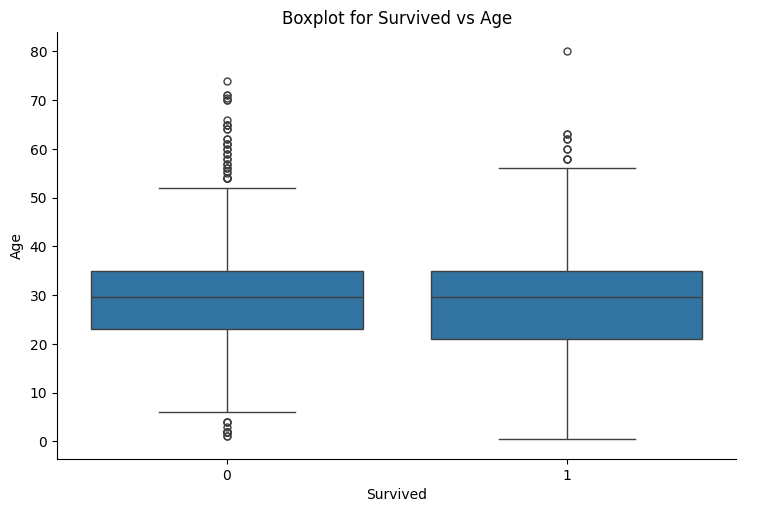

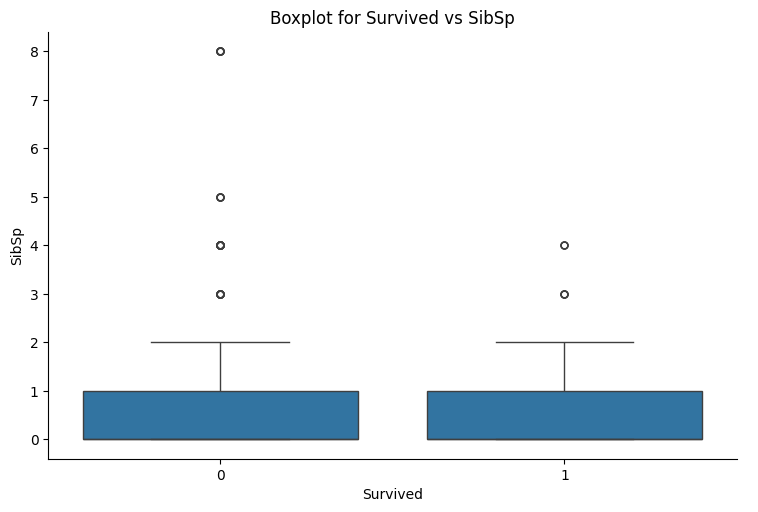

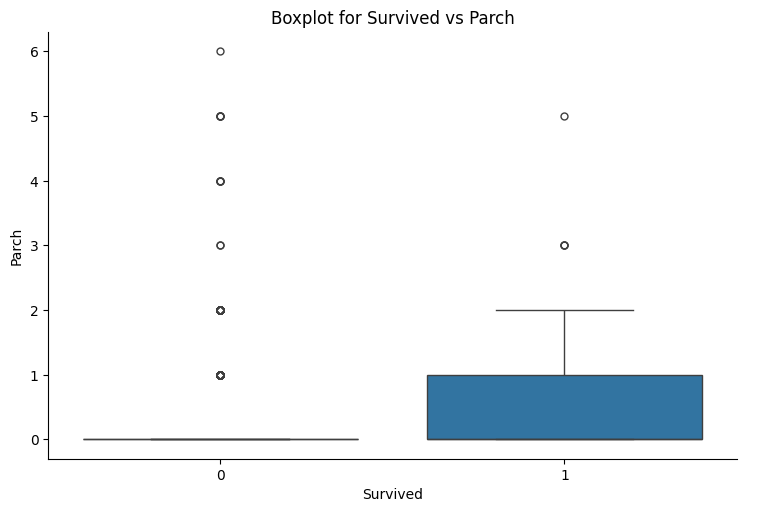

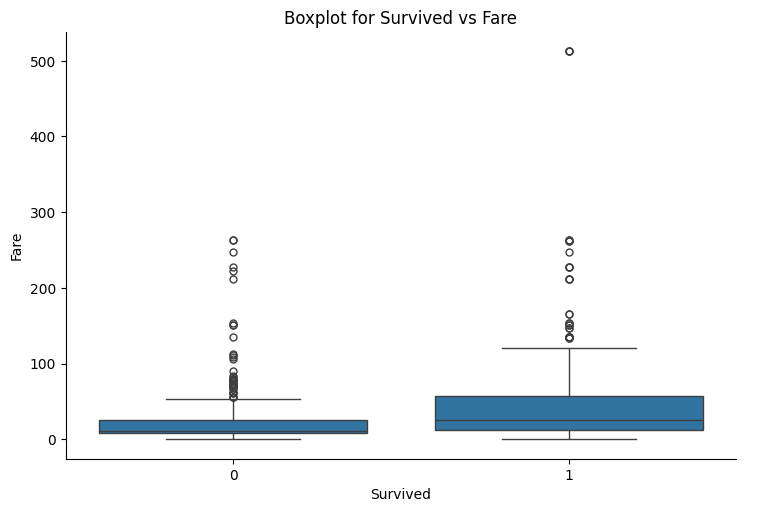

In [ ]:
column = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for i in range (0,5,1):
  sns.catplot(x="Survived", y=column[i], data=df, kind="box", aspect = 1.5)
  if column[i] == 'Pclass':
    plt.title("Boxplot for Survived vs Pclass")
  elif column[i] == 'Age':
    plt.title("Boxplot for Survived vs Age")
  elif column[i] == 'SibSp':
    plt.title("Boxplot for Survived vs SibSp")
  elif column[i] == 'Parch':
    plt.title("Boxplot for Survived vs Parch")
  elif column[i] == 'Fare':
    plt.title("Boxplot for Survived vs Fare")

  plt.show()

In [ ]:
df["Cabin"] = LabelEncoder().fit_transform(df["Cabin"])
df["Sex"] = LabelEncoder().fit_transform(df["Sex"])
df["Embarked"] = LabelEncoder().fit_transform(df["Embarked"])

In [ ]:
df["Embarked"]

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [ ]:
Y = df["Survived"]
X = df.drop(columns=["Survived"])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(712, 8) (179, 8)


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)
score = accuracy_score(Y_test, y_pred)
print("Accuracy Score: ", score*100)

Accuracy Score:  77.6536312849162


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The accuracy score is 77.65

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
cm

array([[87, 13],
       [27, 52]])

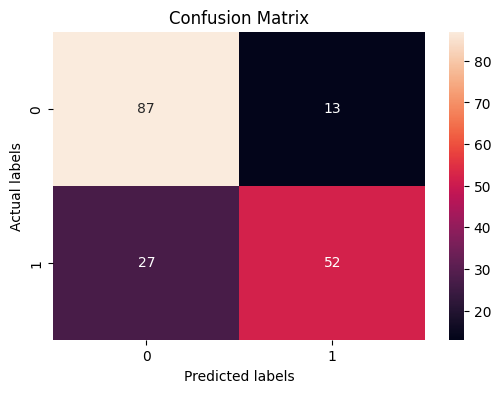

In [ ]:
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot= True, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix")
plt.show()

27 values which were actually 1 were predicted as 0 (false negatives) and 13 values which were actually 0 were predicted as 1 (false positives).